<a href="https://colab.research.google.com/github/rasathuraikaran/Machinelearning/blob/main/imageprcoess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get grey scale image**

In [43]:
from PIL import Image
import numpy as np

def process_image(input_path, output_path, new_dimensions):
    # Load the image using PIL
    image = Image.open(input_path)

    # Resize the image to the desired dimensions
    resized_image = image.resize(new_dimensions)

    # Convert the image to grayscale
    gray_image = resized_image.convert('L')

    # Convert the grayscale image to double precision
    gray_image_np = np.array(gray_image, dtype=np.float64)

    # Save the grayscale image as JPEG
    gray_image.save(output_path, 'JPEG')

    # Get the dimensions of the grayscale image
    width, height = gray_image.size

    # Display the dimensions
    print(f"Image Dimensions: {width} x {height}")
    print(f"Output Path: {output_path}")

# Example usage
input_path = '/content/image3.jpeg'
output_path = '/content/gray_image.jpg'
new_dimensions = (1920, 1080)

process_image(input_path, output_path, new_dimensions)


Image Dimensions: 1920 x 1080
Output Path: /content/gray_image.jpg


**Get DCT of image**

Image Dimensions: 1920 x 1080
Output Path: /content/gray_image.jpg


'/content/dct_image.jpg'

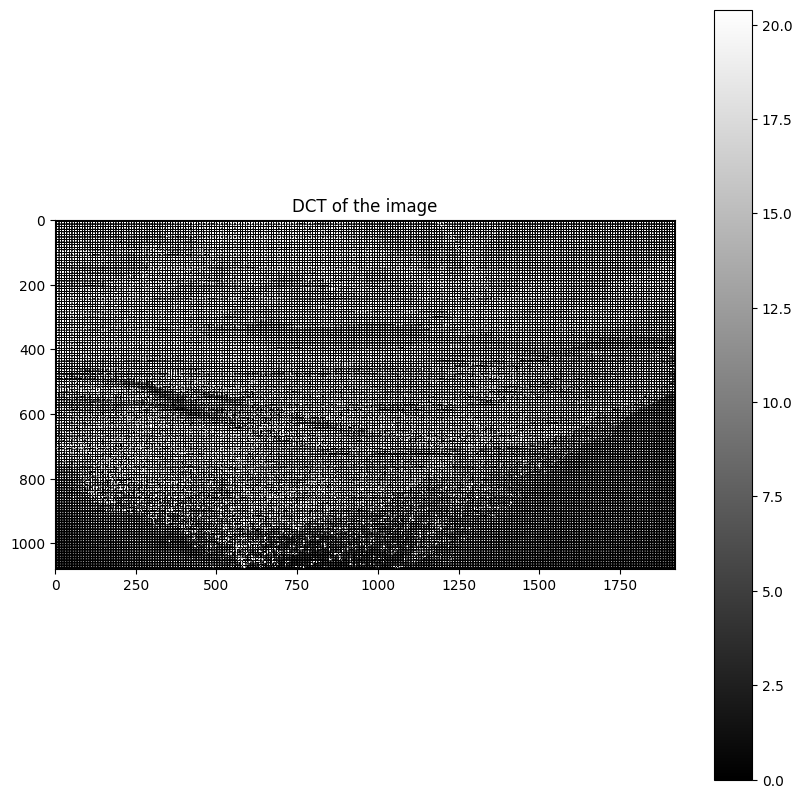

In [44]:
# Load and process the image
input_path = '/content/image3.jpeg'
output_path = '/content/gray_image.jpg'
new_dimensions = (1920, 1080)

# Process the image to grayscale
process_image(input_path, output_path, new_dimensions)

# Load the grayscale image into an array
gray_image = Image.open(output_path)
gray_image_np = np.array(gray_image, dtype=np.float64)

# Apply DCT to the entire image (by blocks)
dct_image = apply_dct_to_blocks(gray_image_np)

# Display and save the DCT image
plt.figure(figsize=(10, 10))
plt.imshow(dct_image, cmap='gray', vmax=np.max(dct_image)*0.01, vmin=0)
plt.title('DCT of the image')
plt.colorbar()

# Save the DCT image
dct_output_path = '/content/dct_image.jpg'
plt.imsave(dct_output_path, dct_image, cmap='gray', vmax=np.max(dct_image)*0.01, vmin=0)

# Display the DCT output path
dct_output_path



In [45]:
import numpy as np

# Define a custom quantization matrix for JPEG compression
custom_quantization_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                       [12, 12, 14, 19, 26, 58, 60, 55],
                                       [14, 13, 16, 24, 40, 57, 69, 56],
                                       [14, 17, 22, 29, 51, 87, 80, 62],
                                       [18, 22, 37, 56, 68, 109, 103, 77],
                                       [24, 35, 55, 64, 81, 104, 113, 92],
                                       [49, 64, 78, 87, 103, 121, 120, 101],
                                       [72, 92, 95, 98, 112, 100, 103, 99]])

# Function to quantize DCT blocks based on a specified quality factor
def custom_quantize_dct_blocks(dct_blocks, quality_factor=1):
    # Adjust the quantization matrix based on quality factor
    scaled_quantization_matrix = custom_quantization_matrix * quality_factor

    # Get the dimensions of the DCT blocks
    height, width = dct_blocks.shape
    quantized_blocks = np.zeros_like(dct_blocks)

    i = 0
    while i < height:
        j = 0
        while j < width:
            # Extract the current 8x8 block
            current_block = dct_blocks[i:i+8, j:j+8]

            # Quantize the block by dividing by the scaled quantization matrix
            quantized_block = np.round(current_block / scaled_quantization_matrix)

            # Assign the quantized block back to its position
            quantized_blocks[i:i+8, j:j+8] = quantized_block

            j += 8  # Move to the next block horizontally

        i += 8  # Move to the next block vertically

    return quantized_blocks

# Example usage
# Assuming that 'dct_image' is already defined
quantized_low_quality = custom_quantize_dct_blocks(dct_image, quality_factor=3)  # Applying lower quality quantization
quantized_medium_quality = custom_quantize_dct_blocks(dct_image, quality_factor=2.5)  # Applying medium quality quantization
quantized_high_quality = custom_quantize_dct_blocks(dct_image, quality_factor=2)  # Applying higher quality quantization

# You can then save or process these quantized blocks as needed


In [46]:
quantized_low_quality

array([[10., -0., -0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [47]:
quantized_medium_quality

array([[12., -0., -0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [48]:
quantized_high_quality

array([[15., -0., -0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
import heapq
from collections import defaultdict

# Step 1: Generate frequency table
def calculate_frequency(data):
    frequency_table = defaultdict(int)
    for val in data.flatten():
        frequency_table[val] += 1
    return frequency_table

# Step 2: Build Huffman Tree
def construct_huffman_tree(frequency_table):
    heap = [[weight, [symbol, ""]] for symbol, weight in frequency_table.items()]
    heapq.heapify(heap)

    for _ in range(len(heap) - 1):
        lowest = heapq.heappop(heap)
        highest = heapq.heappop(heap)

        for pair in lowest[1:]:
            pair[1] = '0' + pair[1]
        for pair in highest[1:]:
            pair[1] = '1' + pair[1]

        heapq.heappush(heap, [lowest[0] + highest[0]] + lowest[1:] + highest[1:])

    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

# Step 3: Generate Huffman Codes
def generate_huffman_codes(tree):
    return {symbol: code for symbol, code in tree}

# Step 4: Encode the Data
def huffman_encoding(data, codes):
    encoded_data = ''

    for val in data.flatten():
        encoded_data += codes[val]

    return encoded_data

# Example usage with quantized data
frequency_table = calculate_frequency(quantized_medium_quality)
huffman_tree = construct_huffman_tree(frequency_table)
huffman_codes = generate_huffman_codes(huffman_tree)
encoded_data = huffman_encoding(quantized_medium_quality, huffman_codes)


# The `encoded_data` is now the Huffman encoded string of the quantized data


In [50]:
def save_data_to_file(data, file_path):
    # Write the data to the file
    with open(file_path, 'w') as file:
        file.write(data)

compressed_data_path = "/content/huffman_compress.txt"
save_data_to_file(encoded_data, compressed_data_path)


In [51]:
# Step 1: Create a Reverse Lookup Table from Huffman Codes
def create_reverse_lookup_table(huffman_codes):
    return {code: symbol for symbol, code in huffman_codes.items()}

# Step 2: Decode the Encoded Data
def huffman_decode(encoded_data, lookup_table):
    decoded_values = []
    current_code = ""
    for bit in encoded_data:
        current_code += bit
        if current_code in lookup_table:
            decoded_values.append(lookup_table[current_code])
            current_code = ""
    return decoded_values

# Example usage
reverse_lookup_table = create_reverse_lookup_table(huffman_codes)
decoded_values = huffman_decode(encoded_data, reverse_lookup_table)

# Convert the list of values back to the original shape (quantized image shape)
decoded_image = np.array(decoded_values).reshape(quantized_medium_quality.shape)


In [52]:
from scipy.fftpack import idct

# Function to perform Inverse Quantization with a while loop
def inverse_quantization(quantized_blocks, quality_factor=1):
    scaled_quantization_matrix = custom_quantization_matrix * quality_factor
    height, width = quantized_blocks.shape
    inverse_quantized_blocks = np.zeros_like(quantized_blocks)

    i = 0
    while i < height:
        j = 0
        while j < width:
            block = quantized_blocks[i:i+8, j:j+8]
            inverse_quantized_block = block * scaled_quantization_matrix
            inverse_quantized_blocks[i:i+8, j:j+8] = inverse_quantized_block
            j += 8
        i += 8

    return inverse_quantized_blocks

# Function to apply 2D IDCT to blocks of image with a while loop
def apply_inverse_dct_to_blocks(dct_blocks, block_size=8):
    height, width = dct_blocks.shape
    idct_blocks = np.zeros_like(dct_blocks)

    i = 0
    while i < height:
        j = 0
        while j < width:
            block = dct_blocks[i:i+block_size, j:j+block_size]
            idct_block = idct(idct(block.T, norm='ortho').T, norm='ortho')
            idct_blocks[i:i+block_size, j:j+block_size] = idct_block
            j += block_size
        i += block_size

    return idct_blocks

# Perform Inverse Quantization
inverse_quantized_image = inverse_quantization(decoded_image, quality_factor=1)

# Perform Inverse DCT
reconstructed_image = apply_inverse_dct_to_blocks(inverse_quantized_image)

# Clip the values to get valid pixel range (0-255) and convert to integers
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)


In [53]:
reconstructed_image

array([[24, 24, 24, ..., 22, 22, 22],
       [24, 24, 24, ..., 22, 22, 22],
       [24, 24, 24, ..., 22, 22, 22],
       ...,
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4]], dtype=uint8)

**Get reconstructed image**

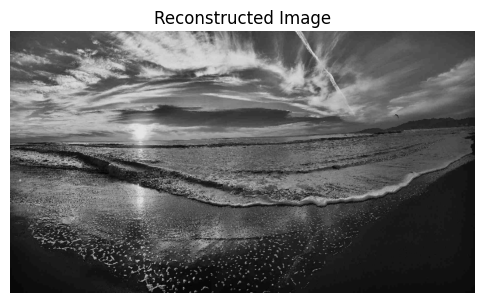

In [54]:
import matplotlib.pyplot as plt

# Assuming 'decoded_image' is the result of the decoding process

# Step 1: Inverse Quantization
inverse_quantized_result = inverse_quantization(decoded_image, quality_factor=1)  # Adjust quality factor if necessary

# Step 2: Inverse Discrete Cosine Transform (IDCT)
reconstructed_result = apply_inverse_dct_to_blocks(inverse_quantized_result)

# Step 3: Clip pixel values to ensure they are within the valid range of 0-255
clipped_reconstructed_result = np.clip(reconstructed_result, 0, 255).astype(np.uint8)

# Step 4: Visualize the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(clipped_reconstructed_result, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')  # Hide the axis for better visualization
plt.show()



In [55]:

import numpy as np
from PIL import Image
import io
import heapq
from collections import defaultdict
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# Utility Functions
def load_image_grayscale(image_path):
    with Image.open(image_path) as img:
        return np.array(img.convert('L'), dtype=np.float64)

def compute_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def apply_dct_quantize(image, scale_factor):
    # Apply 2D DCT to the entire image
    dct_image = apply_dct_to_blocks(image)

    # Quantize DCT coefficients based on a custom quantization matrix and scale factor
    quantized_image = custom_quantize_dct_blocks(dct_image, scale_factor)

    return quantized_image
    # ...
def huffman_encode(data):
    # Step 1: Calculate frequency of each value in the data
    frequency_table = calculate_frequency(data)

    # Step 2: Construct Huffman tree
    huffman_tree = construct_huffman_tree(frequency_table)

    # Step 3: Generate Huffman codes
    huffman_codes = generate_huffman_codes(huffman_tree)

    # Step 4: Encode the data using Huffman codes
    encoded_data = huffman_encoding(data, huffman_codes)

    return encoded_data

def estimate_bitrate(encoded_data):
    buffer = io.BytesIO()
    buffer.write(encoded_data.encode())
    return buffer.tell() * 8




def find_optimal_scaling(image, target_rate):
    scale = 2.0
    step = 0.2
    best_psnr, best_scale = 0, scale
    target_reached = False

    while not target_reached:
        quantized = apply_dct_quantize(image, scale)
        encoded = huffman_encode(quantized)
        bitrate = estimate_bitrate(encoded)
        if bitrate < target_rate:
            scale -= step
        elif bitrate > target_rate:
            scale += step
        else:
            target_reached = True

        # Assuming a function 'inverse_process' to decode and reconstruct the image
        # reconstructed = inverse_process(encoded)
        psnr = compute_psnr(image, clipped_reconstructed_result)
        print('Bitrate',bitrate,' Scale',scale)


        if psnr > best_psnr:
            best_psnr, best_scale = psnr, scale
        if scale <= 0.5 or scale > 5.3:
            break


    return scale, best_psnr, encoded

# Main Execution
image_path = '/content/gray_image.jpg'
E_No = 182
target_bitrate = (E_No + 300) * 1000 * 1024
image = load_image_grayscale(image_path)
# Define the compression rate as 2%
compression_rate = 0.02

# Calculate the target bitrate based on the compression rate
target_bitrate_2_percent = target_bitrate * compression_rate
scale, psnr, encoded_data = find_optimal_scaling(image, target_bitrate_2_percent)
print(f"Optimal Scale: {scale}, Best PSNR: {psnr}")



Bitrate 22721032  Scale 2.2
Bitrate 22136784  Scale 2.4000000000000004
Bitrate 21910408  Scale 2.6000000000000005
Bitrate 21778640  Scale 2.8000000000000007
Bitrate 21609440  Scale 3.000000000000001
Bitrate 21035712  Scale 3.200000000000001
Bitrate 20870744  Scale 3.4000000000000012
Bitrate 20661864  Scale 3.6000000000000014
Bitrate 20596136  Scale 3.8000000000000016
Bitrate 20492576  Scale 4.000000000000002
Bitrate 20127632  Scale 4.200000000000002
Bitrate 20065720  Scale 4.400000000000002
Bitrate 19898992  Scale 4.600000000000002
Bitrate 19859448  Scale 4.8000000000000025
Bitrate 19790360  Scale 5.000000000000003
Bitrate 19548520  Scale 5.200000000000003
Bitrate 19502120  Scale 5.400000000000003
Optimal Scale: 5.400000000000003, Best PSNR: 11.241717415926672
